<a href="https://colab.research.google.com/github/irythmgarg/HEART-DISEASE-PREDICTION-/blob/main/HEART_DISEASE_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASE PREDICTION PROJECT USING LOGISTIC REGRESSION AND POWER TRANSFORMERS**

## **dataset link** https://drive.google.com/file/d/1CEql-OEexf9p02M5vCC1RDLXibHYE9Xz/view

### **IMPORTING DEPENDENCIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Loading of dataset**

In [ ]:
df=pd.read_csv('/content/heart_disease_data.csv'); # load data set
df.head(6)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
# number of rows and columns
df.shape

(303, 14)

In [ ]:
df.describe() # statistical measures of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum().sum() # number of missing values

0

In [ ]:
df[df.columns[df.shape[1]-1]].value_counts()
# 0 ---> means no heart disease and 1 --> means heart disease

target
1    165
0    138
Name: count, dtype: int64

# **Separating data and labels**

In [ ]:
y=df['target']; # data
x=df.iloc[:,0:df.shape[1]-1]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# **spliting training and testing data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
print(x_train.shape);
print(x_test.shape);
print(y_train.shape);
print(y_test.shape);

(242, 13)
(61, 13)
(242,)
(61,)


<Axes: xlabel='target'>

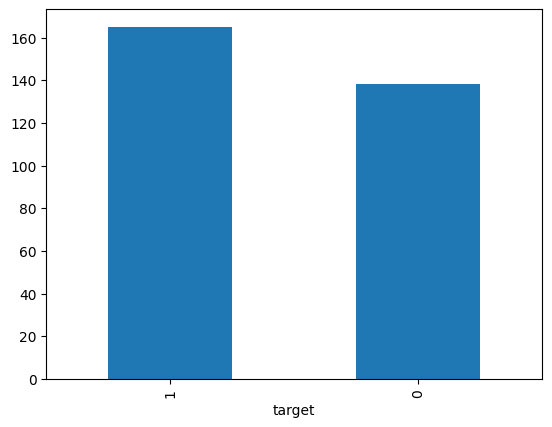

In [ ]:
(df['target'].value_counts()).plot(kind='bar') # barplot to check is dataset balanced or not

<Axes: ylabel='count'>

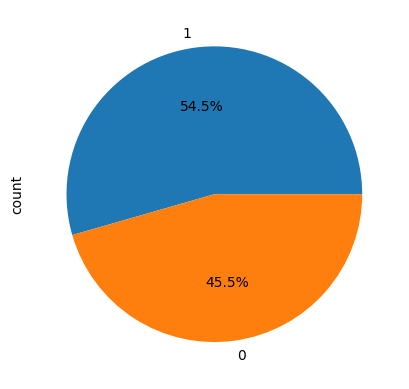

In [ ]:
(df['target'].value_counts()).plot(kind='pie',autopct='%1.1f%%') # pieplot to check is dataset balanced or not

so here percentage is approximattely equal to each other so it is a balanced dataset

In [ ]:
x_train.sample(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3


In [ ]:
for i in x_train.columns:
  print(i, x_train[i].nunique()) # number of unique values in each column

age 41
sex 2
cp 4
trestbps 48
chol 135
fbs 2
restecg 3
thalach 84
exang 2
oldpeak 39
slope 3
ca 5
thal 4


In [ ]:
import seaborn as sns# to plot kde plots
import matplotlib.pyplot as plt

In [ ]:
num_cols = ['age'	,	'trestbps',	'chol','thalach','oldpeak']; # numerical columns

# KDE PLOT OF EACH NUMERICAL COLUMN TO CHECK **DISTRIBUTION**

<ipython-input-190-23cf5e268376>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train[column], shade=True)


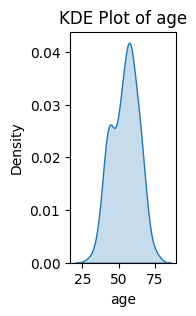

<ipython-input-190-23cf5e268376>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train[column], shade=True)


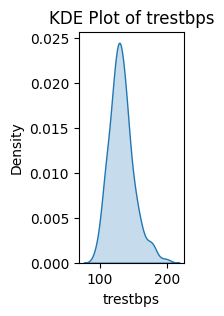

<ipython-input-190-23cf5e268376>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train[column], shade=True)


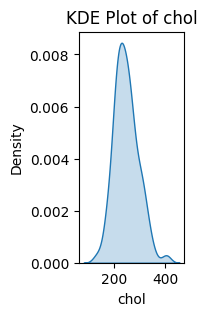

<ipython-input-190-23cf5e268376>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train[column], shade=True)


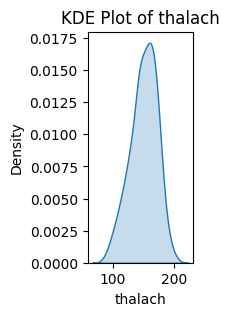

<ipython-input-190-23cf5e268376>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train[column], shade=True)


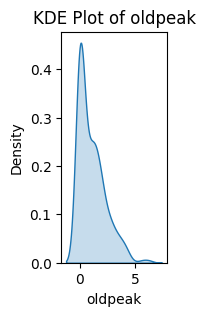

In [ ]:
   for column in num_cols:
    plt.figure(figsize=(3, 3))
    plt.subplot(1, 2, 1)
    sns.kdeplot(x_train[column], shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [ ]:
import scipy.stats as stats # for Q-Q plot

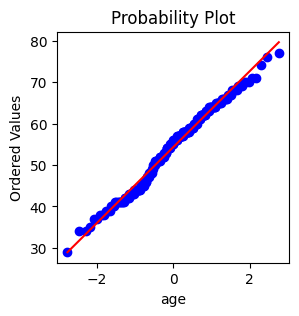

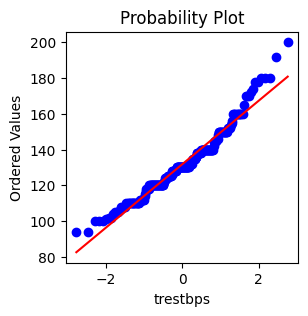

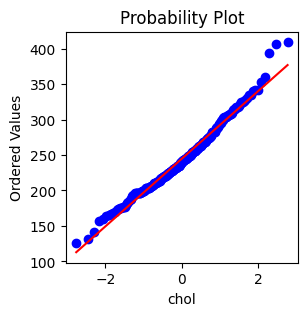

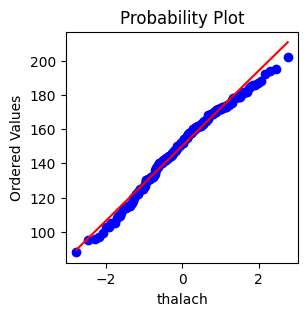

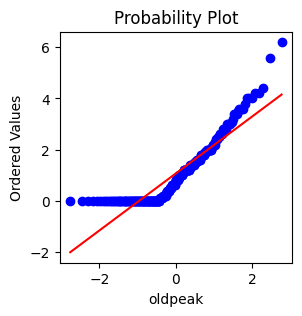

In [ ]:
for i in num_cols: # Q-Q plot of each numerical column
 plt.figure(figsize=(3,3))
 stats.probplot(x_train[i], dist="norm", plot=plt)
 plt.xlabel(i)


# **PREDICTION WITHOUT USING FUNCTION TRANSFORMER AND STANDARD SCALERS**

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test);

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

## PREDICTION RESULT WITHOUT USING FUNCTION TRANSFORMER AND STANDARD SCALERS

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8032786885245902

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,x_train,y_train,cv=10))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.835

# **POWER TRANSFORMER TO REDUCE SKEWNESS ON DATASET**

In [ ]:
from sklearn.preprocessing import PowerTransformer
trf=PowerTransformer()

In [ ]:
x_train_trans=trf.fit_transform(x_train);
x_test_tran=trf.transform(x_test);

# **COLUMN TRANSFORMER TO APPLY STANDARD SCALER AND POWERTRANSFORMER IN ONE GO**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct=ColumnTransformer([('trf',trf,num_cols),('trf2',StandardScaler(),slice(0,13))]
                    , remainder='passthrough')

In [ ]:
num_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
x_train.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2


# **TRANSFORMED TRAINING AND TESTING DATA**

In [ ]:
x_train_trans=pd.DataFrame(ct.fit_transform(x_train))

In [ ]:
x_test_trans=pd.DataFrame(ct.transform(x_test))
x_test_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.274619,1.052245,0.701815,-1.630780,-0.080487,0.296763,0.68313,-0.936000,1.018718,0.651659,-0.404304,-1.028992,-1.738241,1.396861,-0.392021,-0.667736,0.246171,-2.217514
1,1.421500,-0.284490,0.267123,0.552780,-0.702184,1.391527,0.68313,-0.936000,-0.373476,0.190911,2.473388,0.857493,0.587076,-0.715891,-0.724313,-0.667736,1.207034,1.095069
2,-0.917130,0.567890,1.339026,-1.342720,0.904132,-0.907478,0.68313,-0.936000,0.461840,1.384668,-0.404304,0.857493,-1.373486,1.396861,0.604853,-0.667736,1.207034,1.095069
3,0.612683,0.567890,-1.328432,0.155683,1.404395,0.625192,0.68313,1.050947,0.461840,-1.254163,-0.404304,-1.028992,0.222320,-0.715891,1.601727,-0.667736,-0.714691,-0.561223
4,-0.492835,0.567890,-0.177083,0.552780,-0.080487,-0.469573,0.68313,1.050947,0.461840,-0.248894,-0.404304,0.857493,0.587076,-0.715891,-0.392021,-0.667736,0.246171,1.095069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.386716,1.052245,0.834267,0.502029,0.344789,0.406239,-1.46385,2.044420,1.018718,0.798261,2.473388,-1.028992,0.541481,-0.715891,-0.059730,0.948185,-0.714691,-0.561223
57,0.274619,-0.609786,2.047110,0.552780,-0.080487,0.296763,-1.46385,-0.936000,-0.651915,2.285221,-0.404304,0.857493,0.587076,1.396861,-0.392021,0.948185,-0.714691,-0.561223
58,-0.058042,-1.337385,-0.046983,-1.113409,1.337729,-0.031667,0.68313,-0.936000,-1.208792,-0.123235,-0.404304,0.857493,-1.099919,1.396861,1.435581,-0.667736,0.246171,1.095069
59,0.386716,1.052245,0.586114,-1.665367,0.149785,0.406239,0.68313,-0.936000,1.018718,0.526001,-0.404304,-1.028992,-1.783836,1.396861,-0.225876,0.948185,-0.714691,1.095069


## PLOTS AFTER TRANFORMATION

<ipython-input-207-159040a40461>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_trans[column], shade=True)


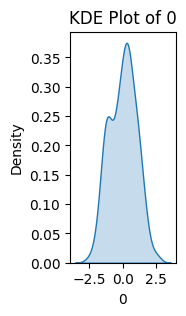

<ipython-input-207-159040a40461>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_trans[column], shade=True)


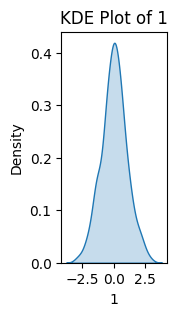

<ipython-input-207-159040a40461>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_trans[column], shade=True)


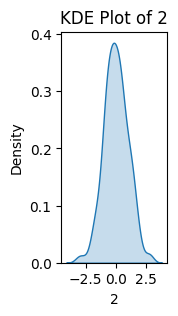

<ipython-input-207-159040a40461>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_trans[column], shade=True)


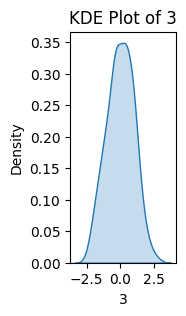

<ipython-input-207-159040a40461>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x_train_trans[column], shade=True)


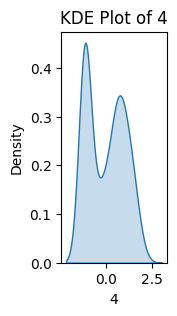

In [ ]:
  for column in [0,1,2,3,4]:
    plt.figure(figsize=(3, 3))
    plt.subplot(1, 2, 1)
    sns.kdeplot(x_train_trans[column], shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

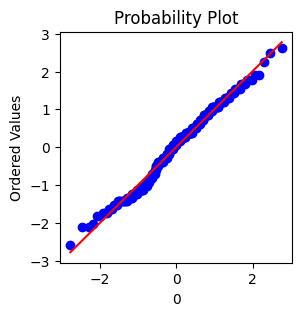

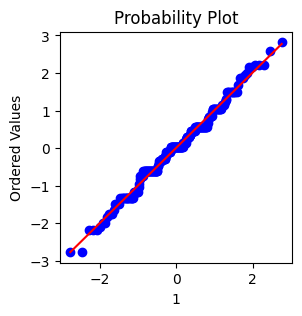

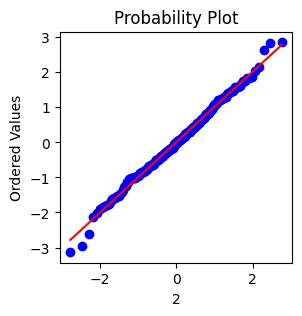

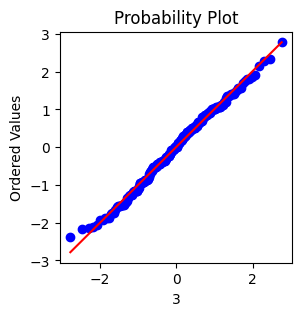

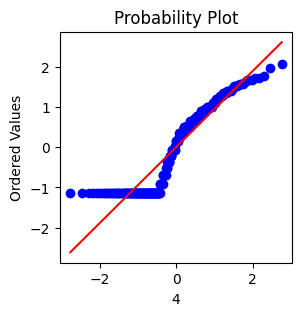

In [ ]:
for i in [0,1,2,3,4]:
 plt.figure(figsize=(3,3))
 stats.probplot(x_train_trans[i], dist="norm", plot=plt)
 plt.xlabel(i)


In [ ]:
lr2=LogisticRegression()
lr2.fit(x_train_trans,y_train)
y_pred2=lr2.predict(x_test_trans)

# **ACCURACY AFTER TRANFORMATION**

In [ ]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [ ]:
np.mean(cross_val_score(lr2,x_train_trans,y_train,cv=10))

0.8145

# **IN THIS CASE AFTER APPLYING TRANSFORMATION ACCURACY DECREASES AS IT HAPPENS SOMETIMES BUT MOSTLY ACCURACY INCREASES**